# Imports

In [2]:
import plotting
import loading
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import numpy as np

## Load files

In [3]:
folder = '/home/gizem/Documents/OnedriveHVL/Belgelerim/PhD Related/Papers/Conceptualized HRC/Data'
file = 'full_cycle_cleaned.csv' 
csv_filename = os.path.join(folder, file)
df = pd.read_csv(csv_filename)

print(df.head(3))
# print(df['ID_ELAPSED_TIME'].head(5))

   ID_ELAPSED_TIME                                           ID_LHAND  \
0         0.000000                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1         0.099863  [0.19770876108090935, 0.10072023117181693, -0....   
2         0.199874  [0.19835623356224322, 0.10047139758773276, -0....   

                                            ID_RHAND  \
0                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1  [0.13989519784793164, -0.1526223252161937, -0....   
2  [0.1401749645363755, -0.15291899707897127, -0....   

                                             ID_HAND  \
0                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1  [0.004272358647480962, 0.0012268646827825191, ...   
2  [0.004612947328177672, 0.0010660428960990453, ...   

                              ID_TGOAL  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   

                                          ID_TACTUAL           ID_STATUS  
0            

In [9]:
print(type(df.ID_ELAPSED_TIME[0]))

<class 'numpy.float64'>


In [ ]:
arr = df['ID_HAND'][0].split(',')
arr = [float(x.strip('[],')) for x in arr]
print(arr)

In [19]:
status = []
arr = df['ID_STATUS'][1].split(',')
arr

['IDLE', 'HUMAN_LEADING']

In [4]:
lhand = []
rhand = []
hand = []
tgoal = []
tactual = []
hrc_status = []
for index,row in df.iterrows():
    temp_arr = df['ID_LHAND'][index].split(',')
    lhand.append([float(x.strip('[],')) for x in temp_arr])
    temp_arr = df['ID_RHAND'][index].split(',')
    rhand.append([float(x.strip('[],')) for x in temp_arr])
    temp_arr = df['ID_HAND'][index].split(',')
    hand.append([float(x.strip('[],')) for x in temp_arr])
    temp_arr = df['ID_TGOAL'][index].split(',')
    tgoal.append([float(x.strip('[],')) for x in temp_arr])
    temp_arr = df['ID_TACTUAL'][index].split(',')
    tactual.append([float(x.strip('[],')) for x in temp_arr])
    hrc_status.append(df['ID_STATUS'][index].split(','))

lhand_df = pd.DataFrame(lhand, columns=['pos_x', 'pos_y', 'pos_z', 'ori_x', 'ori_y', 'ori_z', 'ori_w'])
rhand_df = pd.DataFrame(rhand, columns=['pos_x', 'pos_y', 'pos_z', 'ori_x', 'ori_y', 'ori_z', 'ori_w'])
hand_df = pd.DataFrame(hand, columns=['pos_x', 'pos_y', 'pos_z', 'ori_x', 'ori_y', 'ori_z', 'ori_w'])
tgoal_df = pd.DataFrame(tgoal, columns=['pos_x', 'pos_y', 'pos_z', 'ori_x', 'ori_y', 'ori_z', 'ori_w'])
tactual_df = pd.DataFrame(tactual, columns=['pos_x', 'pos_y', 'pos_z', 'ori_x', 'ori_y', 'ori_z', 'ori_w'])
status_df = pd.DataFrame(hrc_status, columns=['state', 'role'])
# df['ID_LHAND'] = np.array(lhand)
# df['ID_RHAND'] = np.array(rhand)
# df['ID_HAND'] = np.array(hand)
# df['ID_TGOAL'] = np.array(tgoal)
# df['ID_TACTUAL'] = np.array(tactual)

## Sectoring

In [5]:
robot_leading_start_index = status_df.loc[status_df['role'] == 'ROBOT_LEADING'].index[0]
robot_leading_end_index = status_df.loc[status_df['role'] == 'ROBOT_LEADING'].index[-1]

idle_start_index = status_df.loc[status_df['state'] == 'IDLE'].index[0]
approach_start_index = status_df.loc[status_df['state'] == 'APPROACH'].index[0]
colift_start_index = status_df.loc[status_df['state'] == 'CO-LIFT'].index[0]
release_start_index = status_df.loc[status_df['state'] == 'RELEASE'].index[0]

In [58]:
df.ID_ELAPSED_TIME[approach_start_index]

7.70027899742126

## Plotting

Text(0, 0.5, 'position (m)')

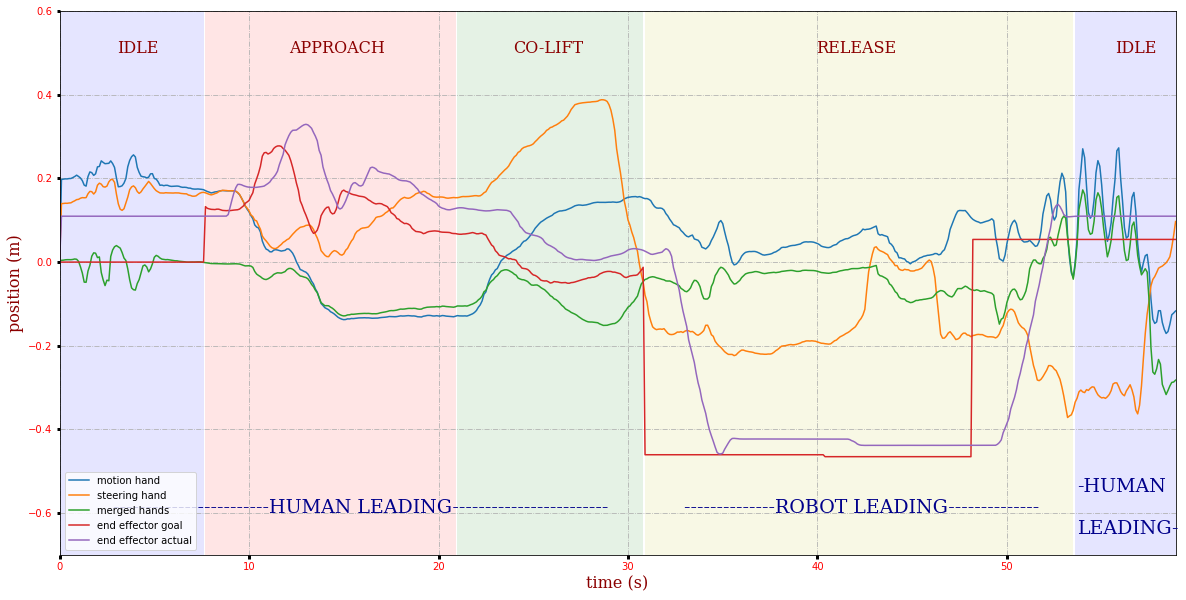

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xlim([0, df.ID_ELAPSED_TIME[len(df.index)-1]])
plt.ylim([-0.7, 0.6])
ax.plot(df.ID_ELAPSED_TIME, lhand_df.pos_x, label='motion hand')
ax.plot(df.ID_ELAPSED_TIME, rhand_df.pos_x, label='steering hand')
ax.plot(df.ID_ELAPSED_TIME, hand_df.pos_x, label='merged hands')
ax.plot(df.ID_ELAPSED_TIME, tgoal_df.pos_x, label='end effector goal')
ax.plot(df.ID_ELAPSED_TIME, tactual_df.pos_x, label='end effector actual')
ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='r', labelsize='medium', width=3)
plt.legend(loc='lower left')

plt.axvspan(df.ID_ELAPSED_TIME[idle_start_index], df.ID_ELAPSED_TIME[approach_start_index-1], facecolor='b', alpha=0.1)
plt.axvspan(df.ID_ELAPSED_TIME[approach_start_index], df.ID_ELAPSED_TIME[colift_start_index-1], facecolor='r', alpha=0.1)
plt.axvspan(df.ID_ELAPSED_TIME[colift_start_index], df.ID_ELAPSED_TIME[release_start_index-1], facecolor='g', alpha=0.1)
plt.axvspan(df.ID_ELAPSED_TIME[release_start_index], df.ID_ELAPSED_TIME[robot_leading_end_index-1], facecolor='y', alpha=0.1)
plt.axvspan(df.ID_ELAPSED_TIME[robot_leading_end_index], df.ID_ELAPSED_TIME[len(df.index)-1], facecolor='b', alpha=0.1)


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

idle_text_pos = (3*df.ID_ELAPSED_TIME[idle_start_index] + 2*df.ID_ELAPSED_TIME[approach_start_index-1])/5.0
plt.text(idle_text_pos, 0.5, 'IDLE', fontdict=font)
approach_text_pos = (4*df.ID_ELAPSED_TIME[approach_start_index] + 2*df.ID_ELAPSED_TIME[colift_start_index-1])/6.0
plt.text(approach_text_pos, 0.5, 'APPROACH', fontdict=font)
colift_text_pos = (3*df.ID_ELAPSED_TIME[colift_start_index] + 2*df.ID_ELAPSED_TIME[release_start_index-1])/5.0
plt.text(colift_text_pos-1, 0.5, 'CO-LIFT', fontdict=font)
release_text_pos = (3*df.ID_ELAPSED_TIME[release_start_index] + 2*df.ID_ELAPSED_TIME[robot_leading_end_index-1])/5.0
plt.text(release_text_pos, 0.5, 'RELEASE', fontdict=font)
idle2_text_pos = (3*df.ID_ELAPSED_TIME[robot_leading_end_index] + 2*df.ID_ELAPSED_TIME[len(df.index)-1])/5.0
plt.text(idle2_text_pos, 0.5, 'IDLE', fontdict=font)

font2 = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 19,
        }

human_text_pos = (10*df.ID_ELAPSED_TIME[idle_start_index] + df.ID_ELAPSED_TIME[robot_leading_start_index-1])/11.0
plt.text(human_text_pos, -0.6, '------------------------HUMAN LEADING------------------------', fontdict=font2)
plt.text(release_text_pos-7, -0.6, '--------------ROBOT LEADING--------------', fontdict=font2)
plt.text(idle2_text_pos-2, -0.55, '-HUMAN', fontdict=font2)
plt.text(idle2_text_pos-2, -0.65, 'LEADING-', fontdict=font2)


plt.xlabel('time (s)', fontdict=font)
plt.ylabel('position (m)', fontdict=font)

In [9]:
fig.savefig('plot1.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [10]:
fig.savefig('myimage.svg', format='svg', dpi=1200)